In [2]:
# импорт библиотек
import numpy as np
import matplotlib.pyplot as plt
# импортируем класс keras, позволяющий создавать многослойные нейросети
from tensorflow import keras
# импортируем класс Dense, позволяющий создавать слои из нейронов в сетях
from tensorflow.keras.layers import Dense
# испорт класса последовательной сети слоёв нейронов
from keras.models import Sequential

In [3]:
# пример данных - два стула...кхм...массива. Один в цельсиях, другой в фаренгейтах
c = np.array([-40, -10, 0, 8, 15, 22, 38])
f = np.array([-40, 14, 32, 46, 59, 72, 100])
# создаём экземпляр класса последовтаельной сети
model = Sequential()
# добавляем методом .add первый слой нейронов Dense и задаём им параметры:
# количество нейронов в слое, размеры входных данных (нужно только для первого слоя), функцию активации первого слоя
# возьмём 1 нейрончик, размер данных - у нас массив-колбаса поэтому кортеж 1, функцию активации - линейную (можно пробнуть Relu)
model.add(Dense(1, input_shape=(1,), activation = 'linear'))
# теперь настраиваем процесс, задавая параметры компилятора, который создаст сеть, задаст начальные веса, смещение (отправную точку)
# --оптимизатор определяет и обновляет оптимальный набор параметров модели (вес, смещение), могут использоваться различные алгоритмы
# оптимизатор как бы выбирает путь на ландшафте потерь, выбирая оптимальный маршрут (не всегда)
# выберем Adam - сложный алгоритм, сочетающий в себе несколько других алгоритмов оптимизации
# из параметров зададим скорость обучения или шаг сходимости алгоритма
# --зададим параметр, который алгоритм будет пытаться улучшать 'loss' - в данном случае средний квадрат отклонения mse 
# (для разных задач используются разные метрики)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.1), loss='mse')
# пробнем наполнить нашу модель обучающей выборкой и зададим параметры
# -- c, f - наши тренировочные данные (как Х и y для машин лёрнинг)
# -- epochs - число повторений обучения
# --есть параметр batch_size=32 который отвечает за размер порции данных на 1 обучение, например 32, чтобы целым датасетом за одну
# эпоху нам не разорвало компьютер. У нас датасет маленький - алгоритм съест эпоху за раз
single_neur = model.fit(c, f, epochs=100)
# запустим

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 1369.4630
Epoch 2/100
1/1 [==============================] - 0s 16ms/step - loss: 1274.9309
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 1192.1855
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 1121.3351
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 1062.3342
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 1014.9310
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 978.6155
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 952.5687
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 935.6277
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 926.2875
Epoch 11/100
1/1 [==============================] - 0s 4ms/step - loss: 922.7571
Epoch 12/100
1/1 [==============================] - 0s 8ms/step - loss: 923.0826
Epoch 13/100
1/1 [===========

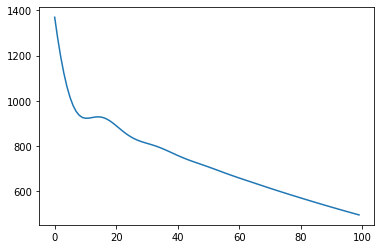

In [4]:
# посмотрим лог обучения и увидим, что loss снижается с каждой эпохой - нейрончик подбирает параметры, изменяет веса (учится)
# ещё смущает время в 0s/step на некоторых эпохах, но, возможно, это баг
# построим график зависимости качества предсказания модели 'loss' от количества прогнанных эпох
plt.plot(single_neur.history['loss'])

In [6]:
# график выглядит как нужно, кроме шишки перед 20 эпохой. Возможно оптимизатор пошёл не в ту сторону, но потом исправился,
# увидев, что квадрат отклонения начал расти (но это только догадки)
# посмотрим, как наша обученная сеть переведёт 100
# должно быть 100*1.8+32 = 212, если я не разучился считать
model.predict([100])

1/1 [==============================] - 0s 233ms/step


array([[208.28384]], dtype=float32)

In [ ]:
# не густо, давайте теперь попробуем дообучить нейросеть, добавив данных и разбив их на батчи
# также планируется добавить эпох (итераций обучения) со 100 до 200

In [17]:
# создадим рандомный массив с данными (одномерный), представим что это градусы цельсия и напишем функцию, 
# переводящую каждый элемент нашего массива в фаренгейты
# сохраним оба массива в переменны add_c (дополнительные цельсии) и add_f (дополнительные фаренгейты)
add_c = np.random.randint(-100, 200, 100)
def cel_to_far(args):
    far = []
    for i in args:
        far.append(i*1.8+32)
    return far
add_f = np.array(cel_to_far(add_c))

In [21]:
# сначала кормим модель новыми данными
add_data_model = model.fit(add_c, add_f, epochs=100, batch_size = 7)
# запустим. Судя по loss, обучение именно что продолжилось на новом датасете, а не началось заново

Epoch 1/100
15/15 [==============================] - 0s 3ms/step - loss: 434.9352
Epoch 2/100
15/15 [==============================] - 0s 3ms/step - loss: 401.3353
Epoch 3/100
15/15 [==============================] - 0s 2ms/step - loss: 439.3745
Epoch 4/100
15/15 [==============================] - 0s 3ms/step - loss: 298.8145
Epoch 5/100
15/15 [==============================] - 0s 3ms/step - loss: 291.8822
Epoch 6/100
15/15 [==============================] - 0s 3ms/step - loss: 243.7719
Epoch 7/100
15/15 [==============================] - 0s 2ms/step - loss: 220.2162
Epoch 8/100
15/15 [==============================] - 0s 3ms/step - loss: 200.6607
Epoch 9/100
15/15 [==============================] - 0s 2ms/step - loss: 166.9048
Epoch 10/100
15/15 [==============================] - 0s 3ms/step - loss: 156.0314
Epoch 11/100
15/15 [==============================] - 0s 3ms/step - loss: 129.9408
Epoch 12/100
15/15 [==============================] - 0s 4ms/step - loss: 117.8798
Epoch 13/100


15/15 [==============================] - 0s 2ms/step - loss: 2.8632e-09


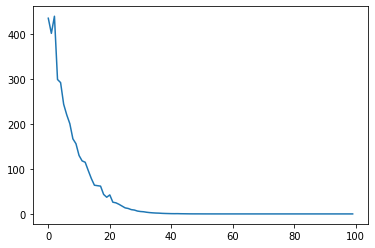

In [22]:
# выводим график ошибки от эпох
plt.plot(add_data_model.history['loss'])

In [23]:
# проверим в работе перевод 200 цельсия. Должно быть 200*1.8+32 = 392
model.predict([200])

1/1 [==============================] - 0s 52ms/step


array([[392.00003]], dtype=float32)

In [25]:
# отлично, такой результат меня устраивает.
# Небольшое наблюдение: есть ощущение, что с бОльшими данными, разбитыми на батчи моделька быстрее учится.

# Теперь попробуем на начальных данных увеличить число эпох в 2 раза и посмотреть что будет с loss
# создам копию нейрона
model_ep = Sequential()
model_ep.add(Dense(1, input_shape=(1,), activation = 'linear'))
model_ep.compile(optimizer=keras.optimizers.Adam(learning_rate=0.1), loss='mse')
add_ep_neur = model_ep.fit(c, f, epochs=200)

Epoch 1/200
1/1 [==============================] - 1s 520ms/step - loss: 3296.1616
Epoch 2/200
1/1 [==============================] - 0s 12ms/step - loss: 3066.1409
Epoch 3/200
1/1 [==============================] - 0s 8ms/step - loss: 2847.8621
Epoch 4/200
1/1 [==============================] - 0s 12ms/step - loss: 2641.5071
Epoch 5/200
1/1 [==============================] - 0s 8ms/step - loss: 2447.2249
Epoch 6/200
1/1 [==============================] - 0s 12ms/step - loss: 2265.1206
Epoch 7/200
1/1 [==============================] - 0s 8ms/step - loss: 2095.2539
Epoch 8/200
1/1 [==============================] - 0s 16ms/step - loss: 1937.6359
Epoch 9/200
1/1 [==============================] - 0s 8ms/step - loss: 1792.2216
Epoch 10/200
1/1 [==============================] - 0s 8ms/step - loss: 1658.9073
Epoch 11/200
1/1 [==============================] - 0s 12ms/step - loss: 1537.5264
Epoch 12/200
1/1 [==============================] - 0s 12ms/step - loss: 1427.8470
Epoch 13/200
1/1 

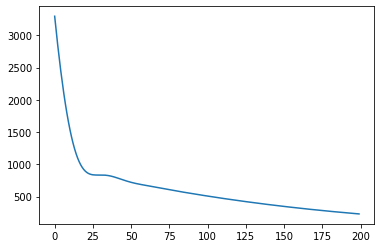

In [26]:
# посмотрим график
plt.plot(add_ep_neur.history['loss'])

In [ ]:
# несколько замечаний:
- в первое обучение мы начали с меньшей ошибки. Возможная причина - оптимизатору повезло подобать пааметры лучше,
чем при обучении во второй раз
- на 100 эпохе второго обучения квадрат ошибки +- равен квадрату ошибки после 1 обучения. Вроде логично. 

На этом хватит мучить нейрончик. Задавать значение бессмысленно, оно будет точнее, чем в 1 раз и грубее, чем после дообучения.